## Project 2: Food Delivery Analysis
## Author: CHAUHAN KUNJ KIRAN
## ID : D24AIML082

##Customer Segmentation for Personalized Marketing in Food Delivery Services using Clustering and PCA

### Problem Statement:
In the competitive food delivery industry, businesses often struggle to understand and
engage their diverse user base effectively. Users differ widely in terms of age, spending
habits, order frequency, app usage, and preferences. Without segmenting these users into
meaningful groups, companies miss opportunities to personalize marketing, improve user
satisfaction, and increase retention.

### Project Goal:
The goal of this project is to segment users of a food delivery app into meaningful
clusters based on their behavior and demographics using unsupervised learning techniques.
By identifying distinct customer groups, the business can tailor marketing campaigns,
improve service offerings, and optimize customer engagement strategies.

Problem Statement:
- In the competitive food delivery industry, businesses often struggle to understand and
engage their diverse user base effectively. Users differ widely in terms of age, spending
habits, order frequency, app usage, and preferences. Without segmenting these users into
meaningful groups, companies miss opportunities to personalize marketing, improve user
satisfaction, and increase retention.
Project Goal:
- The goal of this project is to segment users of a food delivery app into meaningful
clusters based on their behavior and demographics using unsupervised learning techniques.
By identifying distinct customer groups, the business can tailor marketing campaigns,
improve service offerings, and optimize customer engagement strategies.
__________________________
Learning Objectives
Data Understanding & Exploration
1. Load and inspect food delivery user data to understand variable types (e.g., numeric
vs. categorical), ranges, and distributions.

2. Summarize and interpret key statistical properties (mean, median, standard
deviation, skewness) of user behavior features like Age, Total Orders, Average
Spend, etc.

3. Visualize data distributions using histograms, box plots, and pair plots to explore
potential groupings or outliers.

4. Identify relationships between user variables (e.g., App Usage Time and Average
Spend) through correlation matrices and scatter plots.
Data Cleaning & Preprocessing


5. Drop or encode irrelevant or categorical features (e.g., UserID, FavoriteCuisine) as
appropriate for unsupervised learning models.

6. Standardize numerical features using StandardScaler to ensure equal contribution to
distance-based clustering.

7. Evaluate the effect of scaling and dimensionality reduction on the data’s structure
through pre- and post-processing visualizations.
Dimensionality Reduction with PCA

8. Apply Principal Component Analysis (PCA) to reduce high-dimensional data to 2D
for effective visualization of user clusters.

9. Interpret principal components by examining feature loadings to understand which
user behaviors contribute most to variance.

10. Visualize PCA-transformed data to observe potential natural clusters and separation
of user types.
Unsupervised Learning: Clustering

11. Implement K-Means clustering on scaled user data and interpret resulting clusters in
the context of user behavior.

12. Determine the optimal number of clusters using the Elbow Method or Silhouette
Score.

13. Apply Agglomerative (Hierarchical) Clustering and visualize results using
dendrograms to understand hierarchical relationships among users.

14. Compare clustering results from K-Means and Hierarchical Clustering to identify
consistency or divergence in groupings.
Model Evaluation & Visualization

15. Label PCA scatter plots with cluster assignments to visually interpret how users are
grouped in reduced dimensions.

16. Analyze cluster characteristics by computing average values of features within each
cluster (e.g., high spenders, frequent users).

17. Create a cluster profile summary to describe each segment using business-relevant
insights (e.g., “young frequent users,” “older high spenders”).
Critical Thinking & Real-world Framing

18. Frame the clustering output as a customer segmentation strategy for personalized
marketing or product recommendations.

19. Explain how unsupervised learning helps businesses make data-driven decisions in
the absence of labeled training data.

20. Reflect on limitations of clustering models (e.g., sensitivity to scaling, shape of
clusters) and suggest ways to improve (e.g., DBSCAN, inclusion of more behavioral
data).
_______________

### Importing Required Libraries

We begin by importing essential Python libraries for data analysis and visualization:
- `pandas` for data manipulation
- `numpy` for numerical operations
- `matplotlib.pyplot` and `seaborn` for visualizations

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###LOAD THE DATASET

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/SEM5_ML/food_delivery - food_delivery.csv')

In [ ]:
df.head()

,UserID,Age,TotalOrders,AverageSpend,FavoriteCuisine,DeliveryRating,AppUsageTimePerDay
0,1,56,37,312.70,Mexican,4.6,20.9
1,2,46,34,193.97,Mexican,3.0,150.2
2,3,32,22,291.66,Mexican,4.1,59.7
3,4,25,30,232.21,Thai,3.7,85.5
4,5,38,27,244.84,Italian,4.7,13.7


In this dataset, the only non-numerical feature is FavoriteCuisine.

###Data Summary
We apply .info() to examine column data types and identify missing values, and use .describe() to generate statistical overviews, including mean, standard deviation, minimum, and maximum for numeric columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   UserID              500 non-null    int64  
 1   Age                 500 non-null    int64  
 2   TotalOrders         500 non-null    int64  
 3   AverageSpend        500 non-null    float64
 4   FavoriteCuisine     500 non-null    object 
 5   DeliveryRating      500 non-null    float64
 6   AppUsageTimePerDay  500 non-null    float64
dtypes: float64(3), int64(3), object(1)
memory usage: 27.5+ KB


In [ ]:
df.describe(include='all')

,UserID,Age,TotalOrders,AverageSpend,FavoriteCuisine,DeliveryRating,AppUsageTimePerDay
count,500.000000,500.000000,500.000000,500.000000,500,500.000000,500.000000
unique,NaN,NaN,NaN,NaN,5,NaN,NaN
top,NaN,NaN,NaN,NaN,Thai,NaN,NaN
freq,NaN,NaN,NaN,NaN,108,NaN,NaN
mean,250.500000,39.326000,29.714000,306.584680,NaN,3.759400,93.515400
std,144.481833,12.200386,5.747196,74.732407,NaN,0.731794,48.472478
min,1.000000,18.000000,14.000000,80.900000,NaN,2.500000,10.100000
25%,125.750000,29.000000,25.000000,256.685000,NaN,3.100000,49.325000
50%,250.500000,41.000000,30.000000,305.170000,NaN,3.800000,93.100000
75%,375.250000,50.000000,33.000000,355.870000,NaN,4.400000,137.275000


###Key Insights from Dataset Analysis
<b>Significant Spending Disparity:</b> User spending ranges from ₹80 to ₹539 per order, with an average of ₹306. The top 25% spend above ₹355, indicating a robust premium user segment.

<b>App Engagement Varies Widely:</b> Daily app usage spans 10 to 179 minutes, with a high standard deviation, making it a key feature for behavioral clustering.

<b>Thai Cuisine Preference Stands Out:</b> 21.6% of users prefer Thai cuisine, unsuitable for direct clustering but valuable for targeted promotional campaigns.

<b>Inflated Delivery Ratings:</b> Ratings average 3.76, with no scores below 2.5, suggesting potential bias in feedback. Alternative satisfaction metrics should be investigated.

<b>Youthful User Base Opportunity:</b> 25% of users are under 30, presenting a chance for tailored marketing or products aimed at Gen Z.

###Verify Missing Data
To confirm data integrity, we use .isnull().sum() to check for missing values in each column.

In [ ]:
df.isnull().sum()

,0
UserID,0
Age,0
TotalOrders,0
AverageSpend,0
FavoriteCuisine,0
DeliveryRating,0
AppUsageTimePerDay,0


###Identify Duplicate Entries
We use .duplicated().sum() to determine the number of duplicate rows in the dataset. If duplicates exist, we can eliminate them to ensure a clean dataset.

In [ ]:
print(df.duplicated().sum())

0


There are no missing values in the dataset

In [ ]:
df['FavoriteCuisine'].value_counts()

,count
FavoriteCuisine,
Thai,108
Italian,106
Indian,104
Mexican,95
Chinese,87


###Extracting Numerical Columns from DataFrame df
This is valuable for tasks such as statistical analysis, visualization, or scaling, as it allows you to focus solely on numerical data, excluding non-numerical columns like strings or dates.

In [ ]:
numercial_cols = df.select_dtypes(include=['int64','float64'])

###Visualizing Key Features with Histograms
The following code creates histograms for all features in the dataset, excluding UserID:

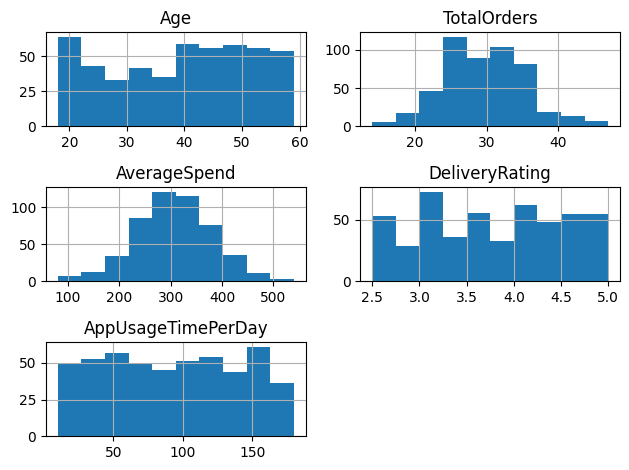

In [ ]:
hist = df.drop(columns='UserID',axis=1).hist()
plt.tight_layout()
plt.show()

###Analysis of Feature Distributions

*   Age: Slightly left-skewed distribution, with a notable concentration of users
under 30, reflecting a strong Gen Z and Millennial presence.

*   TotalOrders: Displays a near-normal bell-shaped distribution centered around 30 orders, offering good potential for segmenting casual versus loyal users.

*   AverageSpend: Normally distributed, suggesting consistent spending patterns without significant skew, which supports reliable clustering.

*   FavoriteCuisine: Uniformly distributed integers (0–4), indicating encoded categories. This should be excluded from clustering unless one-hot encoded.

*   DeliveryRating: Bimodal distribution with peaks at 3 and 5, pointing to polarized user experiences. Potential dissatisfaction clusters warrant further exploration.

*   AppUsageTimePerDay: Uniform distribution from 10 to 180 minutes, showing high engagement variance. Proper scaling is essential to prevent this feature from dominating PCA or clustering.

###Applying LabelEncoder for Categorical Data
LabelEncoder converts categorical text data into numerical format by assigning a unique integer (0, 1, 2, ...) to each distinct category in a column.

Since many machine learning models require numerical inputs, LabelEncoder transforms labels (e.g., 'Male', 'Female', 'Yes', 'No') into numeric values that models can process.

`le = LabelEncoder()`
- Creates an instance of the LabelEncoder class.

`df['FavoriteCuisine'] = le.fit_transform(df['FavoriteCuisine'])`

``fit_transform():``

- fit: Finds all unique values in the 'FavoriteCuisine' column.

- transform: Converts each category into a numeric label (e.g., 'Italian' → 0, 'Chinese' → 1, 'Indian' → 2, etc.).

- This replaces the original string values in the column with their corresponding numeric codes.

`df['FavoriteCuisine']`
- Displays the newly transformed 'FavoriteCuisine' column, now with numeric labels.

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['FavoriteCuisine'] = le.fit_transform(df['FavoriteCuisine'])

In [ ]:
df.head()

,UserID,Age,TotalOrders,AverageSpend,FavoriteCuisine,DeliveryRating,AppUsageTimePerDay
0,1,56,37,312.70,3,4.6,20.9
1,2,46,34,193.97,3,3.0,150.2
2,3,32,22,291.66,3,4.1,59.7
3,4,25,30,232.21,4,3.7,85.5
4,5,38,27,244.84,2,4.7,13.7


###Correlation Matrix Overview
A correlation matrix is a table displaying pairwise correlation coefficients between numerical variables, indicating the strength and direction of their relationships.

[]

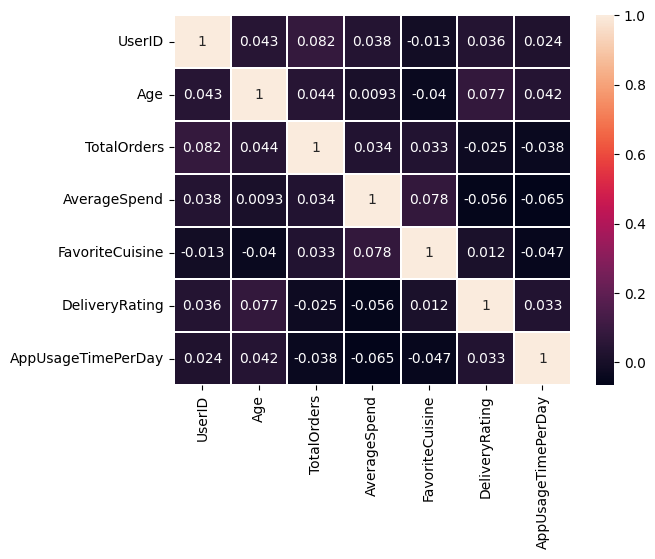

In [ ]:
corr=df.corr()
sns.heatmap(corr,annot =True,linewidth=0.1)
plt.plot()

###Retain Relevant Columns
Unnecessary columns like 'UserID' are dropped from the dataset as they do not aid in clustering. All other features, particularly numerical ones, are kept for further analysis. This ensures the model concentrates on significant attributes.

In [ ]:
X = df.drop('UserID',axis=1)
X

,Age,TotalOrders,AverageSpend,FavoriteCuisine,DeliveryRating,AppUsageTimePerDay
0,56,37,312.70,3,4.6,20.9
1,46,34,193.97,3,3.0,150.2
2,32,22,291.66,3,4.1,59.7
3,25,30,232.21,4,3.7,85.5
4,38,27,244.84,2,4.7,13.7
...,...,...,...,...,...,...
495,56,30,398.62,4,4.3,150.7
496,49,27,423.00,0,3.6,39.0
497,41,31,355.66,4,3.6,15.2
498,40,29,305.66,4,4.1,44.8


###Scale Your Data
Standardization is used to rescale data, ensuring all features contribute equally to clustering algorithms. It transforms data to have a mean of 0 and a standard deviation of 1. Without this step, features with wider ranges could disproportionately influence clustering results.

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

###Apply PCA for Dimensionality Reduction
Principal Component Analysis (PCA) is used to reduce the dataset to two dimensions, enabling visualization of high-dimensional data in 2D space. PCA eliminates redundancy by combining correlated features into principal components.

Why Use PCA?

Multiple features can cause:

*   Slower model performance
*   Overfitting
*   Challenges in visualization

Benefits of PCA:
*   Eliminates redundant or correlated features
*   Simplifies data visualization (2D or 3D)
*   Enhances model speed and potentially accuracy

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X_scaled)

###Cluster Users with KMeans Clustering
KMeans, an unsupervised machine learning algorithm, groups similar data points into clusters. Here, the standardized dataset is divided into 3 clusters using KMeans, assigning a cluster label to each user.

###Clustering Algorithms:

*   KMeans: Partitions data into k distinct, non-overlapping clusters.
*   AgglomerativeClustering: A hierarchical method that builds nested clusters by merging or splitting.
*   DBSCAN: A density-based method that groups closely packed points and identifies outliers as noise.

**from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN**

This imports three clustering algorithms from sklearn.cluster:

*   KMeans: Partition-based clustering.
*   AgglomerativeClustering: Hierarchical clustering.
*   DBSCAN: Density-based clustering.

**kmeans = KMeans(n_clusters=3)**

Initializes a KMeans model to partition the data into 3 clusters.

**kmeans_labels = kmeans.fit_predict(X_scaled)**

*   fit_predict():
  *   Fits the KMeans model to the scaled data (X_scaled).
  *   Assigns each data point a cluster label (0, 1, or 2).
*   The output, kmeans_labels, is an array of cluster assignments for each user.

**centroid_pca = pca.transform(kmeans.cluster_centers_)**

*   kmeans.cluster_centers_ provides the coordinates of cluster centers in the original feature space.
*   pca.transform(...) projects these centers into PCA space (2D, if n_components=2 was used).
*   The result, centroid_pca, represents cluster centroids in the reduced PCA space for visualization.

In [ ]:
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
kmeans = KMeans(n_clusters =3)
kmeans_labels = kmeans.fit_predict(X_scaled)

In [ ]:
centriod_pca = pca.transform(kmeans.cluster_centers_)

###Display Clusters with a Scatter Plot

The PCA-transformed data is visualized in a 2D scatter plot, with each point representing a user. Distinct colors indicate different KMeans clusters, aiding in evaluating the separation of clusters in the feature space.

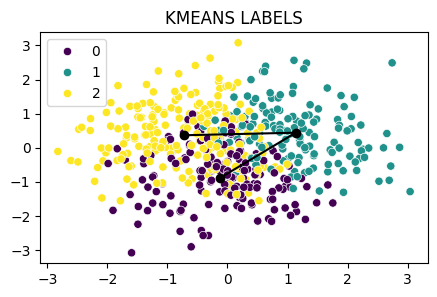

In [ ]:
plt.figure(figsize=(5,3))
sns.scatterplot(x=x_pca[:,0],y=x_pca[:,1],hue = kmeans_labels,palette="viridis")
plt.plot(centriod_pca[:,0],centriod_pca[:,1],color='BLACK',marker='o')
plt.title("KMEANS LABELS")
plt.show()

###Visualizing PCA-Reduced Clusters in a Scatter Plot
The scatter plot shows PCA-reduced user data in 2D, with each point representing a user and colors indicating kmeans_labels. PCA condenses high-dimensional standardized features into two principal components (PC1, PC2), retaining maximum variance. Red markers denote cluster centers from kmeans.cluster_centers_, projected into PCA space via pca.transform().

The clusters are reasonably well-separated, suggesting that features like AverageSpend and AppUsageTimePerDay drive significant variance. Cluster 2 appears more spread out, while Cluster 1 is tightly grouped, indicating lower intra-cluster variance. The red centroids are well-aligned with the core of each cluster, confirming effective KMeans convergence.

Some overlap occurs near the origin, where users have similar feature values. These ambiguous cases may challenge hard clustering methods; alternatives like DBSCAN or GaussianMixture could improve segmentation by leveraging density or probabilistic membership.

###Cluster Users Using Agglomerative Clustering
###Overview of Agglomerative Clustering

Agglomerative Clustering is a hierarchical clustering method that adopts a bottom-up approach:

*   Each data point begins as an individual cluster.
*   The closest clusters are progressively merged.
*   Merging continues until the specified number of clusters (n_clusters) is achieved.


In [ ]:
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(X_scaled)

###Display Clusters from Agglomerative Clustering
A scatter plot is generated to visualize the results of Agglomerative Clustering. Each user is represented as a point in PCA space, with colors indicating their assigned cluster. This visualization facilitates comparison of Agglomerative Clustering's performance with KMeans.

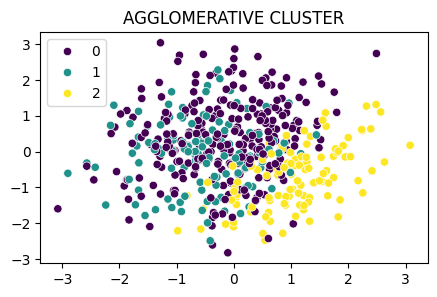

In [ ]:
plt.figure(figsize=(5,3))
sns.scatterplot(x=x_pca[:,1],y=x_pca[:,0],hue=agglo_labels,palette="viridis")
plt.title("AGGLOMERATIVE CLUSTER")
plt.show()

###Visualizing Agglomerative Clustering Results
The scatter plot displays the outcome of AgglomerativeClustering on PCA-reduced data, with each point representing a user and colors indicating cluster labels. The algorithm hierarchically merges similar users based on distance, forming three clusters.

Cluster 2 (yellow) stands out distinctly on the right, while clusters 0 and 1 overlap near the center, suggesting users in these groups have similar feature profiles. Compared to KMeans, Agglomerative Clustering better captures local structure but faces challenges in compact, overlapping regions.

The overlap indicates potential difficulties in separating dense areas, which could be addressed by adjusting linkage criteria or exploring density-based clustering methods like DBSCAN.

###Create a Dendrogram for Cluster Formation Visualization
A dendrogram is a tree-like diagram illustrating the hierarchical merging of clusters at each step. It aids in understanding cluster formation and helps determine the optimal number of clusters by identifying large vertical gaps.

<b>Linkage:</b> Generates the linkage matrix that encodes the hierarchical clustering steps.

*   Uses the 'ward' method to compute the linkage matrix:
  *   The Ward method minimizes within-cluster variance during merging.
  *   It is ideal for clustering based on Euclidean distance.




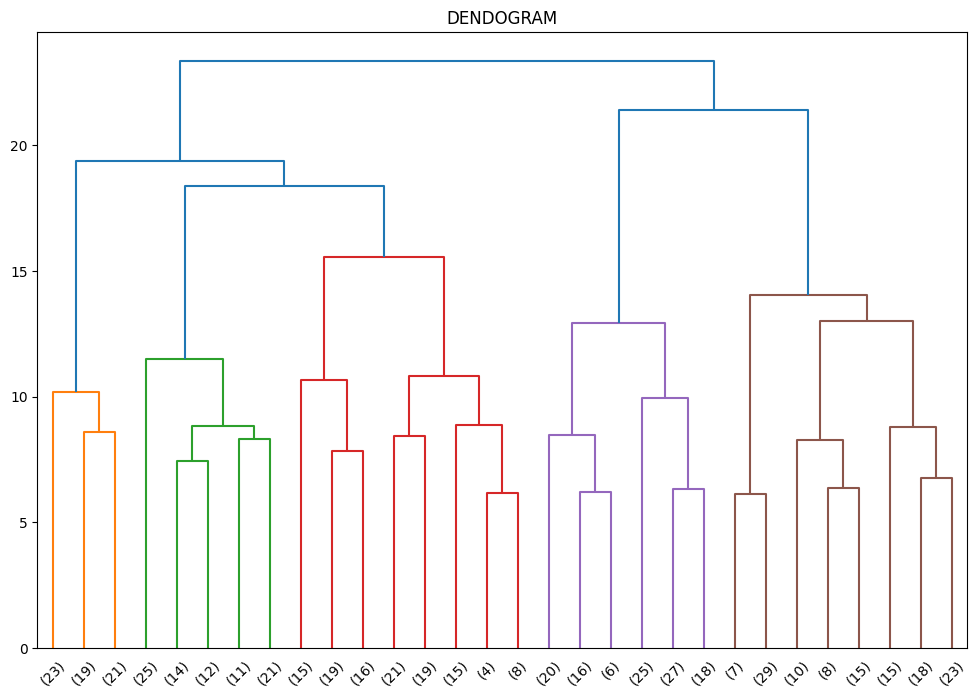

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
plt.figure(figsize=(12,8))
link = linkage(X_scaled,method='ward')
dendrogram(link,p=30,truncate_mode='lastp')
plt.title("DENDOGRAM")
plt.show()

###Visualizing Hierarchical Clustering with a Dendrogram
The dendrogram illustrates the hierarchical merging process in Agglomerative Clustering, showing how individual data points or small clusters combine step-by-step into larger clusters based on similarity, forming a tree-like structure.
*   X-axis: Represents sample indices or small clusters.
*   Y-axis: Displays linkage distance, indicating the dissimilarity between merged clusters.
*   The height of vertical lines (merges) reflects the distance between clusters at the time of merging, with taller lines indicating less similar clusters merged later.

<b>How It Works</b>
*   Each data point begins as an individual cluster.
*   At each step, the two closest clusters, based on a linkage metric (e.g., Ward, average, or complete), are merged.
*   This continues until all points form a single cluster at the top of the tree.
*   To select the number of clusters, a horizontal cut is made across the dendrogram at a chosen height. For instance, cutting where three large vertical jumps occur yields three clusters.

This visualization aids in determining the optimal number of clusters by highlighting significant gaps between merges, where large vertical gaps indicate well-separated clusters.

###Identify User Patterns Using DBSCAN Clustering
What is DBSCAN?

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that groups points based on their proximity, using a distance metric, and identifies low-density points as noise (outliers). Unlike KMeans, DBSCAN detects clusters of arbitrary shapes and marks outliers as noise.

In [ ]:
db = DBSCAN(eps=1.5,min_samples=5)
db_labels = db.fit_predict(X_scaled)

###Apply DBSCAN Clustering to Scaled Data
DBSCAN clustering is performed on the scaled data, grouping points based on density rather than shape or distance from centroids.

Output: db_labels contains cluster assignments, with -1 indicating outliers.

In [ ]:
n_clusters = len(set(db_labels)) - (1 if -1 in db_labels else 0)
print("Number of clusters formed by DBSCAN:", n_clusters)

Number of clusters formed by DBSCAN: 1


In [ ]:
print("Unique labels:", np.unique(db_labels))

Unique labels: [-1  0]


In [ ]:
from collections import Counter
label_counts = Counter(db_labels)
print("Label Counts:", label_counts)

Label Counts: Counter({np.int64(0): 456, np.int64(-1): 44})


In [ ]:
# Count outliers (label = -1)
n_outliers = list(db_labels).count(-1)
print("Number of outliers (noise points):", n_outliers)

Number of outliers (noise points): 44


###Display DBSCAN Clustering Results with a Scatter Plot
The DBSCAN clustering outcomes are visualized in a 2D scatter plot using PCA components. Each point is colored according to its cluster label, with noise points (not assigned to any cluster) typically displayed in a distinct color, such as gray or black.

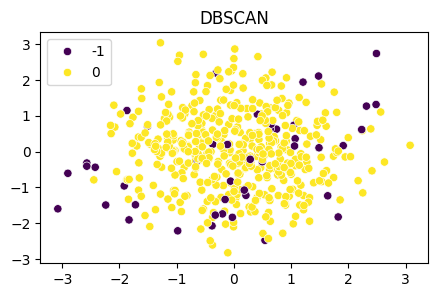

In [ ]:
plt.figure(figsize=(5,3))
sns.scatterplot(x=x_pca[:,1],y=x_pca[:,0],hue=db_labels,palette="viridis")
plt.title("DBSCAN")
plt.show()

###Visualizing DBSCAN Clustering Results on PCA-Reduced Data
The scatter plot displays the results of DBSCAN clustering on PCA-reduced data (PC1, PC2). Each point represents a user, with yellow points (label = 0) forming the single cluster identified by DBSCAN, and purple points (label = -1) indicating noise points (outliers) that failed to meet the density criteria.

DBSCAN clusters data based on density, independent of shape or size. It requires a minimum number of points (min_samples=5) within a specified radius (eps=1.5) to form a cluster. Here, only one dense region was detected, with 44 users marked as outliers, scattered across the plot.

This outcome suggests the data lacks multiple dense, well-separated regions under the current parameters. To enhance clustering, consider adjusting eps and min_samples or applying DBSCAN to a different feature space or higher-dimensional projection.

###Final Conclusion
This project effectively utilized unsupervised machine learning techniques to segment users of a food delivery application based on their behavioral and preference data. The process involved data cleaning, encoding categorical features, and standardizing numerical values. Principal Component Analysis (PCA) was applied to reduce dataset dimensionality, facilitating clear visualizations and enhancing clustering performance.

Several clustering algorithms were explored, including KMeans, Agglomerative Clustering, and DBSCAN, each uncovering distinct data patterns. KMeans efficiently partitioned users into three distinct groups based on similarities. Agglomerative Clustering provided insights into hierarchical user grouping, with the dendrogram offering a detailed view of the merging process. DBSCAN identified arbitrarily shaped clusters and effectively detected outlier users who did not align with the main groups.

In summary, the clustering analysis revealed diverse user behaviors and preferences within the food delivery service, successfully captured and grouped through unsupervised learning techniques.